# Objectives
  In this Exercise you will have to complete the codes with the knowledge you have gained so far about Cost functions, Gradient decent, sigmoid function.
  

## Contents
- [ 1 - Packages ](#1)
- [ 2 - Logistic Regression](#2)
  - [ 2.1 Problem Statement](#2.1)
  - [ 2.2 Loading and visualizing the data](#2.2)
  - [ 2.3  Sigmoid function](#2.3)
  - [ 2.4 Cost function for logistic regression](#2.4)
  - [ 2.5 Gradient for logistic regression](#2.5)

<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

In [1]:
# Import all necessary libraies
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from labbuddy import *
%matplotlib inline

<a name="2"></a>
## 2 - Logistic Regression
In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

<a name="2.1"></a>
### 2.1 Problem Statement

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. 
* You have historical data from previous applicants that you can use as a training set for logistic regression. 
* For each training example, you have the applicant’s scores on two exams and the admissions decision. 
* Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams. 

<a name="2.2"></a>
### 2.2 Loading and visualizing the data

You will start by loading the dataset for this task. 
- Below cell loads the data into variables `x_train` and `y_train`
  - `x_train` contains exam scores on two exams for a student
  - `y_train` is the admission decision 
      - `y_train = 1` if the student was admitted 
      - `y_train = 0` if the student was not admitted 
  - Both `x_train` and `y_train` are numpy arrays.

In [3]:
# In this we are going to train our model with 80% of data and 20% of data will be use to test the accurancy of the model
x_train,x_test,y_train,y_test=load_data(path="Dataset.csv",target="Admitted",train_size=0.8,neglect_feature=[])
print(x_train[:4])
print(y_train[:4])

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]]
[0 0 0 1]


#### Visualize your data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible.
- The code below displays the data on a 2D plot (as shown below), where the axes are the two exam scores, and the positive and negative examples are shown with different markers.
- Don't feel lonely while you have a helper module ``labbuddy.py`` which always help you to visualize your dataset so that you can apply your knowledge more effectively. 

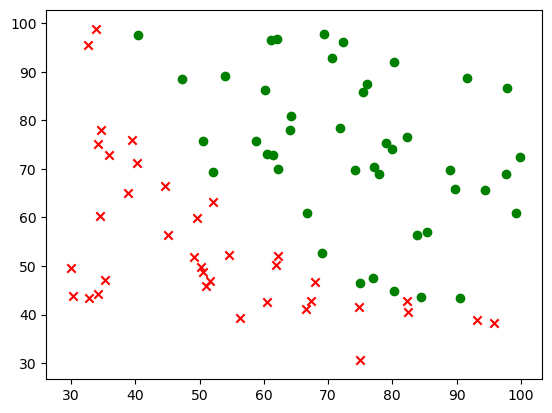

In [5]:
plot_data(x_train,y_train,"sub1","sub2","Admitted","Not Admitted",False)

Your goal is to build a logistic regression model to fit this data.
- With this model, you can then predict if a new student will be admitted based on their scores on the two exams.
>Note:Try your best and if you feel any problem then simply click the `Hints` to get some hints to solve the problem

<a name="2.3"></a>
### 2.3  Sigmoid function

Recall that for logistic regression, the model is represented as

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

Let's implement the sigmoid function first, so it can be used by the rest of this assignment.

<a name='ex-01'></a>
### Exercise 1
Please complete  the `sigmoid` function to calculate

$$g(z) = \frac{1}{1+e^{-z}}$$

Note that 
- `z` is not always a single number, but can also be an array of numbers. 
- If the input is an array of numbers, we'd like to apply the sigmoid function to each value in the input array.

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [6]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
          
    ### START CODE HERE ###
    val=1+np.exp(-z)
    g=1/val
    ### END SOLUTION ###  
    
    return g

<details>
  <summary><font size="3" color="darkgreen"><b>Hints</b></font></summary>
       
   * `numpy` has a function called [`np.exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html), which offers a convinient way to calculate the exponential ( $e^{z}$) of all elements in the input array (`z`).
 
<details>
          <summary><font size="2" color="darkblue"><b> Click for more hints</b></font></summary>
        
  - You can translate $e^{-z}$ into code as `np.exp(-z)` 
    
  - You can translate $1/e^{-z}$ into code as `1/np.exp(-z)` 
    
    If you're still stuck, you can check the hints presented below to figure out how to calculate `g` 
    
    <details>
          <summary><font size="2" color="darkorange"><b>Hint to calculate g</b></font></summary>
        <code>g = 1 / (1 + np.exp(-z))</code>
    </details>


</details>

In [7]:
# Let's try your sigmoid function
value = 0

print (f"sigmoid({value}) = {sigmoid(value)}")
print (f"sigmoid([1,0,2,-5,3,-3]) ={sigmoid(np.array([1,0,2,-5,3,-3]))} ")

sigmoid(0) = 0.5
sigmoid([1,0,2,-5,3,-3]) =[0.73105858 0.5        0.88079708 0.00669285 0.95257413 0.04742587] 


**Expected Outputs**:
<table>
  <tr>
    <td> <b>sigmoid(0)<b></td>
    <td> 0.5 </td> 
  </tr>
</table>
<table>
  <tr>
          <td><b>sigmoid([1,0,2,-5,3,-3])<b></tb>
          <tb>[0.73105858   0.5    0.88079708 0.00669285 0.95257413 0.04742587]</tb>
  </tr>
        
</table>
    
- As mentioned before, your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid function on every element.

<a name="2.4"></a>
### 2.4 Cost function for logistic regression

In this section, you will implement the cost function for logistic regression.

<a name='ex-02'></a>
### Exercise 2

Please complete the `cost` function using the equations below.

Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.

Note:
* As you are doing this, remember that the variables `X_train` and `y_train` are not scalar values but matrices of shape ($m, n$) and ($𝑚$,1) respectively, where  $𝑛$ is the number of features and $𝑚$ is the number of training examples.
* You can use the sigmoid function that you implemented above for this part.

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [8]:
def cost(x, y, w, b):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar) value of bias parameter of the model
    Returns:
      total_cost : (scalar) cost 
    """

    m, n = x.shape
    
    ### STARTCODE HERE ###
    cost=0
    for i in range(m):
        f_wb=sigmoid(np.dot(x[i],w)+b)
        loss=-y[i]*np.log(f_wb)+(y[i]-1)*np.log(1-f_wb)
        cost=cost+loss
    total_cost=cost/m
    
    
    
    
    ### END CODE HERE ### 

    return total_cost

<details>
  <summary><font size="3" color="darkgreen"><b>Hints</b></font></summary>
    
    
    
    
  * You can represent a summation operator eg: $h = \sum\limits_{i = 0}^{m-1} 2i$ in code as follows:
    ```python
        h = 0
        for i in range(m):
            h = h + 2*i
    ```
  
   * In this case, you can iterate over all the examples in `x` using a for loop and add the `loss` from each iteration to a variable (`loss_sum`) initialized outside the loop.

   * Then, you can return the `total_cost` as `loss_sum` divided by `m`.
   * If you are new to Python, please check that your code is properly indented with consistent spaces or tabs. Otherwise, it might produce a different output or raise an `IndentationError: unexpected indent` error.
    <details>
          <summary><font size="2" color="darkblue"><b> Click for more hints</b></font></summary>
        * Here's how you can structure the overall implementation for this function            
        ```python 
        def cost(x, y, w, b):
            m, n =x.shape

            ### START CODE HERE ###
            loss_sum = 0 

            # Loop over each training example
            for i in range(m): 

                # First calculate z_wb = w[0]*x[i][0]+...+w[n-1]*x[i][n-1]+b
                z_wb = 0 
                # Loop over each feature
                for j in range(n): 
                    # Add the corresponding term to z_wb
                    z_wb_ij = # Your code here to calculate w[j] * x[i][j]
                    z_wb += z_wb_ij # equivalent to z_wb = z_wb + z_wb_ij
                # Add the bias term to z_wb
                z_wb += b # equivalent to z_wb = z_wb + b

                f_wb = # Your code here to calculate prediction f_wb for a training example
                loss =  # Your code here to calculate loss for a training example

                loss_sum += loss # equivalent to loss_sum = loss_sum + loss

            total_cost = (1 / m) * loss_sum  
            ### END CODE HERE ### 

            return total_cost
        ```
        If you're still stuck, you can check the hints presented below to figure out how to calculate `z_wb_ij`, `f_wb` and `cost`.
        <details>
          <summary><font size="2" color="darkorange"><b>Hint to calculate z_wb_ij</b></font></summary>
            <table>
              <tr>
                  <td>`z_wb_ij = w[j]*x[i][j]`</td>
              </tr>
            </table>
        </details>
        <details>
          <summary><font size="2" color="darkorange"><b>Hint to calculate f_wb</b></font></summary>
           &emsp; &emsp; $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$ where $g$ is the sigmoid function. You can simply call the `sigmoid` function implemented above.
          <details>
              <summary><font size="2" color="red"><b>&emsp; &emsp; More hints to calculate f</b></font></summary>
               &emsp; &emsp; You can compute f_wb as <code>f_wb = sigmoid(z_wb) </code>
           </details>
       </details>
       <details>
          <summary><font size="2" color="darkorange"><b>Hint to calculate loss</b></font></summary>
          &emsp; &emsp; You can use the <a href="https://numpy.org/doc/stable/reference/generated/numpy.log.html">np.log</a> function to calculate the log
          <details>
              <summary><font size="2" color="red"><b>&emsp; &emsp; More hints to calculate loss</b></font></summary>
              &emsp; &emsp; You can compute loss as <code>loss =-y[i] * np.log(f_wb)-(1 -y[i])* np.log(1 - f_wb)</code>
          </details>
        </details>
</details>

Run the cells below to check your implementation of the `cost` function with two different initializations of the parameters $w$ and $b$

In [9]:
m, n = x_train.shape

# Compute and display cost with w and b initialized to zeros
w1 = np.zeros(n)
b1 = 0
cost1 =cost(x_train, y_train, w1, b1)
w2 = np.array([0.2, 0.2])
b2 = -24.
cost2 = cost(x_train, y_train, w2,b2)

print('Cost at initial w and b (zeros): {:.3f}'.format(cost1))
print('Cost at test w and b (non-zeros): {:.3f}'.format(cost2))

Cost at initial w and b (zeros): 0.693
Cost at test w and b (non-zeros): 0.231


**Expected Output**:
<table>
  <tr>
    <td> <b>Cost at initial w and b (zeros)<b></td>
    <td> 0.693 </td> 
  </tr>
</table>
<table>
  <tr>
    <td> <b>Cost at test w and b (non-zeros):<b></td>
    <td> 0.218 </td> 
  </tr>
</table>

<a name="2.5"></a>
### 2.5 Gradient for logistic regression

In this section, you will implement the gradient for logistic regression.

Recall that the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously


<a name='ex-03'></a>
### Exercise 3

Please complete the `gradient` function to compute $\frac{\partial J(\mathbf{w},b)}{\partial w}$, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ from equations (2) and (3) below.

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label


- **Note**: While this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $f_{\mathbf{w},b}(x)$.

As before, you can use the sigmoid function that you implemented above and if you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [10]:
def find_gradient(X, y, w,b): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ### 
    for i in range(m):
        z_wb = 0
        for j in range(n): 
            z_wb+= X[i,j]*w[j]
        z_wb += b
        f_wb = sigmoid(z_wb)
        
        dj_db_i = f_wb-y[i]
        dj_db += dj_db_i
        for j in range(n):
            dj_dw[j] += (f_wb-y[i])*X[i][j] 
    dj_dw = dj_dw/m
    dj_db = dj_db/m 
    
    ### END CODE HERE ###

        
    return dj_db, dj_dw

 <details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
* Here's how you can structure the overall implementation for this function
    ```python 
       def find_gradient(X, y, w, b): 
            m, n = X.shape
            dj_dw = np.zeros(w.shape)
            dj_db = 0.
        
            ### START CODE HERE ### 
            for i in range(m):
                # Calculate f_wb (exactly as you did in the cost function above)
                f_wb = 
        
                # Calculate the  gradient for b from this example
                dj_db_i = # Your code here to calculate the error
        
                # add that to dj_db
                dj_db += dj_db_i
        
                # get dj_dw for each attribute
                for j in range(n):
                    # You code here to calculate the gradient from the i-th example for j-th attribute
                    dj_dw_ij =  
                    dj_dw[j] += dj_dw_ij
        
            # divide dj_db and dj_dw by total number of examples
            dj_dw = dj_dw / m
            dj_db = dj_db / m
            ### END CODE HERE ###
       
            return dj_db, dj_dw
    ```

    * If you are new to Python, please check that your code is properly indented with consistent spaces or tabs. Otherwise, it might produce a different output or raise an `IndentationError: unexpected indent` error.
    * If you're still stuck, you can check the hints presented below to figure out how to calculate `f_wb`, `dj_db_i` and `dj_dw_ij` 
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate f_wb</b></font></summary>
           &emsp; &emsp; Recall that you calculated f_wb in <code>compute_cost</code> above — for detailed hints on how to calculate each intermediate term, check out the hints section below that exercise
           <details>
              <summary><font size="2" color="darkorange"><b>&emsp; &emsp; More hints to calculate f_wb</b></font></summary>
              &emsp; &emsp; You can calculate f_wb as
               
    ```python 
               for i in range(m):   
                   # Calculate f_wb (exactly how you did it in the compute_cost function above)
                   z_wb = 0
                   # Loop over each feature
                   for j in range(n): 
                       # Add the corresponding term to z_wb
                       z_wb+= X[i,j]*w[j]
            
                   # Add bias term 
                   z_wb += b
        
                   # Calculate the prediction from the model
                   f_wb = sigmoid(z_wb)
    ```
               
    </details>
        
    </details>
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate dj_db_i</b></font></summary>
           &emsp; &emsp; You can calculate dj_db_i as <code>dj_db_i = f_wb - y[i]</code>
    </details>
        
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate dj_dw_ij</b></font></summary>
        &emsp; &emsp; You can calculate dj_dw_ij as <code>dj_dw_ij = (f_wb - y[i])* X[i][j]</code>
    </details>

</details>

Run the cells below to check your implementation of the `find_gradient` function with two different initializations of the parameters **w** and **b**

In [11]:
# Compute and display gradient with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = find_gradient(x_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):-0.043209876543209874
dj_dw at initial w and b (zeros):[-8.181141350193935, -7.646521347385949]


**Expected Output**:
<table>
  <tr>
    <td> <b>dj_db at initial w and b (zeros)<b></td>
    <td> -0.043209876543209874 </td> 
  </tr>
  <tr>
    <td> <b>dj_dw at initial w and b (zeros):<b></td>
    <td> [-8.181141350193935, -7.646521347385949] </td> 
  </tr>
</table>

In [12]:
# Compute and display cost and gradient with non-zero w and b
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = find_gradient(x_train, y_train, test_w, test_b)

print('dj_db at test w and b:', dj_db)
print('dj_dw at test w and b:', dj_dw.tolist())


dj_db at test w and b: -0.5432098765421223
dj_dw at test w and b: [-40.20655954313042, -40.10329811602522]


**Expected Output**:
<table>
  <tr>
    <td> <b>dj_db at test w and b (non-zeros)<b></td>
    <td> -0.5432098765421223 </td> 
  </tr>
  <tr>
    <td> <b>dj_dw at test w and b (non-zeros):<b></td>
    <td>  [-40.20655954313042, -40.10329811602522] </td> 
  </tr>
</table>

<a name="2.6"></a>
### 2.6 Learning parameters using gradient descent 

Similar to the previous assignment, you will now find the optimal parameters of a logistic regression model by using gradient descent. 
- You don't need to implement anything for this part. Simply run the cells below. 

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(\mathbf{w},b)$ and check that it is decreasing with each step. 

- Assuming you have implemented the gradient and computed the cost correctly, your value of $J(\mathbf{w},b)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [13]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value 
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost(you already completed)
      gradient_function :          function to find gradient(function you have just completed)
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant
      
    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<10000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

**Note:** The code block below takes a couple of minutes to run. You can reduce the iterations to test your implementation and iterate faster. If you have time later, try running with high values of iterations for better results.


In [14]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                                   cost, find_gradient, alpha, iterations, 0)

Iteration    0: Cost     1.17   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.31   
Iteration 3000: Cost     0.31   
Iteration 4000: Cost     0.31   
Iteration 5000: Cost     0.31   
Iteration 6000: Cost     0.31   
Iteration 7000: Cost     0.31   
Iteration 8000: Cost     0.31   
Iteration 9000: Cost     0.31   
Iteration 9999: Cost     0.31   


<a name="2.7"></a>
### 2.7 Plotting the decision boundary

We will now use the final parameters from gradient descent to plot the linear fit. If you implemented the previous parts correctly, you should see a plot similar to the following plot:   

We will use a helper function in the `labbuddy.py` file to create this plot.

In [15]:
plot_decision_boundary(w, b, x_train, y_train,"sub1","sub2","Admitted","Not Admitted",True)

TypeError: plot_data() missing 5 required positional arguments: 'xlable', 'ylable', 'lable1', 'lable2', and 'show'